### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 4
### Due: Friday, Sep 22 at 11:59 pm CT

In [1]:
import scipy
import matplotlib
import sklearn
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import poisson
import pandas as pd

## Problem 1

This one is on correlation coefficients. We want to find the link between the price of a 500 ml bottle of water and the distance from the city center. We might expect to find that the price of a bottle of water decreases as the distance from the city center increases. Higher property rents close to the city center should be reflected in higher prices in the shops.

The hypothesis might be written like this:
"The price of a water bottle decreases as distance from the city center increases."

The more objective scientific research method is always to assume that no such price-distance relationship exists (i.e., there is no correlation) and to express the null hypothesis as:
"There is no significant relationship between the price of a water bottle and distance from the city center."

The data are given in the table below. Compute the Pearson's, Spearman's, and Kendall's correlation coefficients and find the significance level by which the null hypothesis is rejected. Show all your calculation and work using python and Markdown. 

| Distance (m)| price ($) |
|-------- | ------- |
| 50  | 1.80    |
| 175 | 1.20    |
| 270 | 2.00    |
| 375 | 1.50    |
| 425 | 0.80    |
| 580 | 0.60    |
| 710 | 1.05    |
| 790 | 0.85    |
| 890 | 0.90    |
| 980 | 1.00    |
| 1000| 0.95    |

In [2]:
#Define your columns
x = pd.Series([50, 175, 270, 375, 425, 580, 710, 790, 890, 980, 1000])
y = pd.Series([1.80, 1.20, 2.00, 1.50, 0.80, 0.60, 1.05, 0.85, 0.90, 1.00, 0.95])

# Compile into one data frame
xy = pd.DataFrame({'x-values': x, 'y-values': y}) 

# In order, Pearson, Spearman, Kendall coefficients
r = x.corr(y, method='pearson')
rho = x.corr(y, method='spearman')
tau = x.corr(y, method='kendall')

print("The Pearson coefficient is", r)
print("The Spearman coefficient is", rho)
print("The Kendall coefficient is", tau)

The Pearson coefficient is -0.6493719424695605
The Spearman coefficient is -0.5545454545454546
The Kendall coefficient is -0.34545454545454546


In [3]:
# Significance level for which the null hypothesis is rejected
# Null hypothesis, they are correlated, large r
# p >=
#1-cdf
print('Pearson:', scipy.stats.pearsonr(x,y))
# Choose some significance, if p-value is lower, null hypothesis is rejected
print('Spearman:', scipy.stats.spearmanr(x,y))
print('Kendall:', scipy.stats.kendalltau(x,y))

Pearson: PearsonRResult(statistic=-0.6493719424695604, pvalue=0.030600513361477802)
Spearman: SignificanceResult(statistic=-0.5545454545454546, pvalue=0.07665233333978251)
Kendall: SignificanceResult(statistic=-0.34545454545454546, pvalue=0.16457331248997917)


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

[ 63.30600786  83.91231753  97.59418613 123.12312915 106.94656637
  96.06654175 108.73487406 111.36437465  99.99652513  89.02527475]
0.00029545656079586725


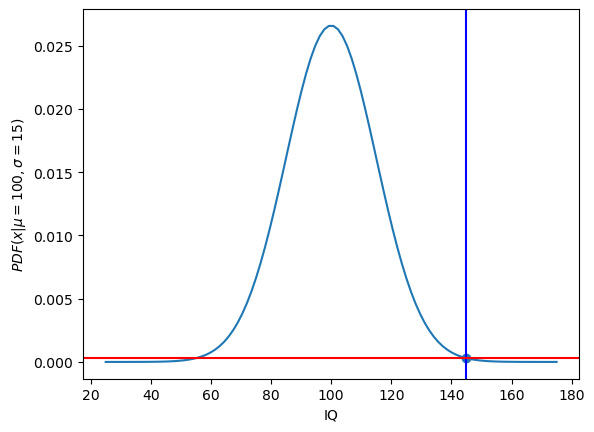

In [16]:
# 1- create Guassian object, plot the distribution
mu = 100
sigma = 15 
iq = scipy.stats.norm(mu, sigma)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))

# 10 random draws, pdf evaluated at x=145
draws = iq.rvs(10) 
p = iq.pdf(x=145) 

print(draws)
print(p)
plt.axvline(x= 145, color = 'b', label = 'axvline - full height');
plt.axhline(y=p, color='r')
plt.scatter(x=145, y=p)
plt.xlabel('IQ')
plt.ylabel(r'$PDF(x|\mu = 100, \sigma = 15)$')
plt.show()

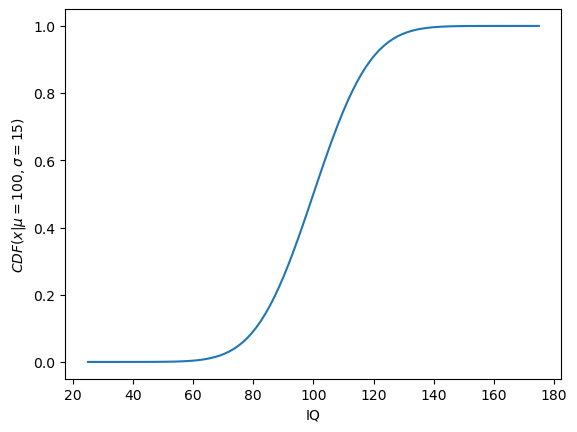

In [17]:
# 2
#ppf is the inverse of the cdf
# cdf=H(x), ppf=f(pdf)
cont = scipy.stats.norm.cdf(x, mu, sigma)
plt.plot(x, cont, label = 'CDF')
plt.ylabel(r'$CDF(x|\mu = 100, \sigma = 15)$')
plt.xlabel('IQ')
# Generate random samples using inverse transform sampling
num_samples = 10000
uniform_samples = np.random.rand(num_samples)
random_samples = norm.ppf(uniform_samples, loc=mu, scale=sigma)

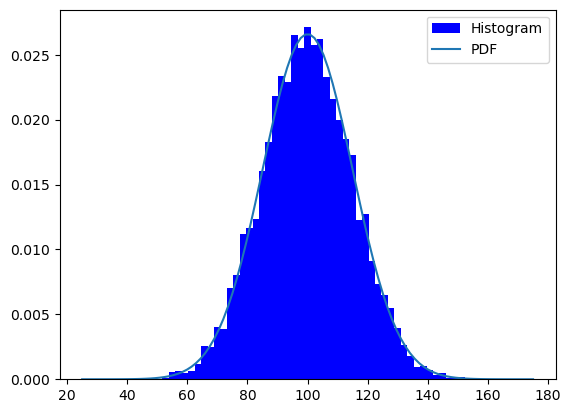

In [21]:
#2 continued
# Create a histogram of the random samples
plt.hist(random_samples, bins = 50, density=True, color='b', label='Histogram')

plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label='PDF')
plt.legend()
plt.show()

In [20]:
# 3 What percent of people have IQ >145
# 1 - CDF(x=145)
smart = 1 - scipy.stats.norm.cdf(x = 145)
print(smart, "percent of people have an IQ above 145.")
print(scipy.stats.norm.cdf(x = 145))

0.0 percent of people have an IQ above 145.
1.0


In [24]:
# 4 What IQ corresponds to "one in a million"?
ppf_millionth = iq.ppf(1 - 10**(-6))
print('A "one in a million" iq would be',ppf_millionth)

A "one in a million" iq would be 171.3013646322563
